In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [2]:
# Load the data
df = pd.read_csv("/content/Mall_Customers.csv")

***Project 4: Customer Segmentation Using Mall Data***

**Introduction:**

This project applies clustering algorithms (K-Means) to categorize mall customers based on spending behavior. K-mean clustering is an unsupervised machine learning technique that group data points into clusters based on similarity. A k means clustering example illustrates how this method assigns data points to the nearest centroid, refining the clusters iteratively. Understanding what is k-means clustering will enhance your grasp of data analysis and pattern recognition.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Cleaning and EDA

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df[df.isnull().any(axis = True)]
# No missing value in the data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


<ipython-input-8-55a3ca3094c5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"])


Text(0, 0.5, 'Count')

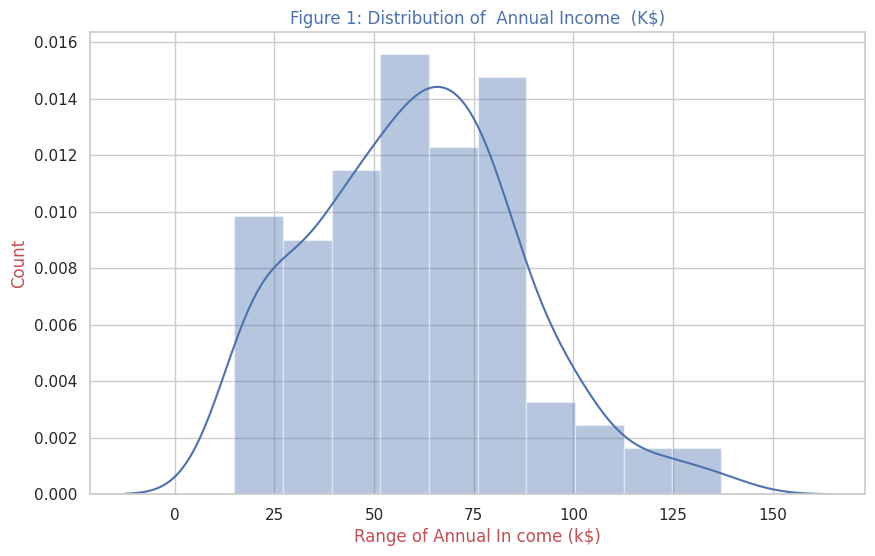

In [8]:
# Checking the distribution of the annual income
plt.figure(figsize = (10, 6))
sns.set(style = "whitegrid")
sns.distplot(df["Annual Income (k$)"])
plt.title("Figure 1: Distribution of  Annual Income  (K$)", color = "b")
plt.xlabel("Range of Annual In come (k$)", color = "r")
plt.ylabel("Count", color = "r")

K_mean Cluster

The goal is to group similar data points together and discover underlying patterns or structures within the data.

***Properties of K-Mean Clustering***

•	Recall the first property of clusters – it states that the points within a cluster should be similar to each other. So, our aim here is to minimize the distance between the points within a cluster.

•	There is an algorithm that tries to minimize the distance of the points in a cluster with their centroid – the k-means clustering technique.

•	K-means is a centroid-based algorithm or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.


Text(0, 0.5, 'Count')

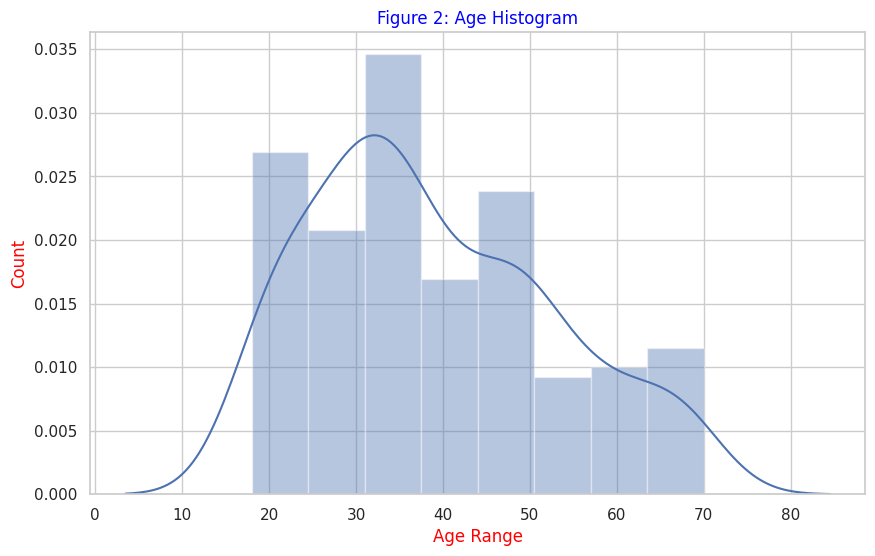

In [11]:
# Checking the distribution of the Age
plt.figure(figsize = (10, 6))
sns.set(style = "whitegrid")
sns.distplot(df["Age"])
plt.title("Figure 2: Age Histogram", color = "blue")
plt.xlabel("Age Range", color = "red")
plt.ylabel("Count", color = "red")

Text(0, 0.5, 'Count')

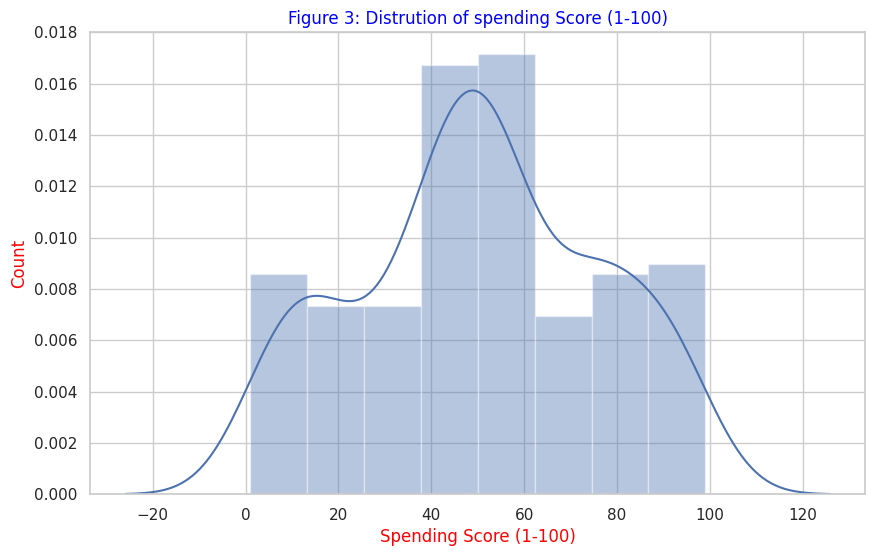

In [12]:
# Checking the distribution of the Age
plt.figure(figsize = (10, 6))
sns.set(style = "whitegrid")
sns.distplot(df["Spending Score (1-100)"])
plt.title("Figure 3: Distrution of spending Score (1-100)", color = "blue")
plt.xlabel("Spending Score (1-100)", color = "red")
plt.ylabel("Count", color = "red")

Questions:

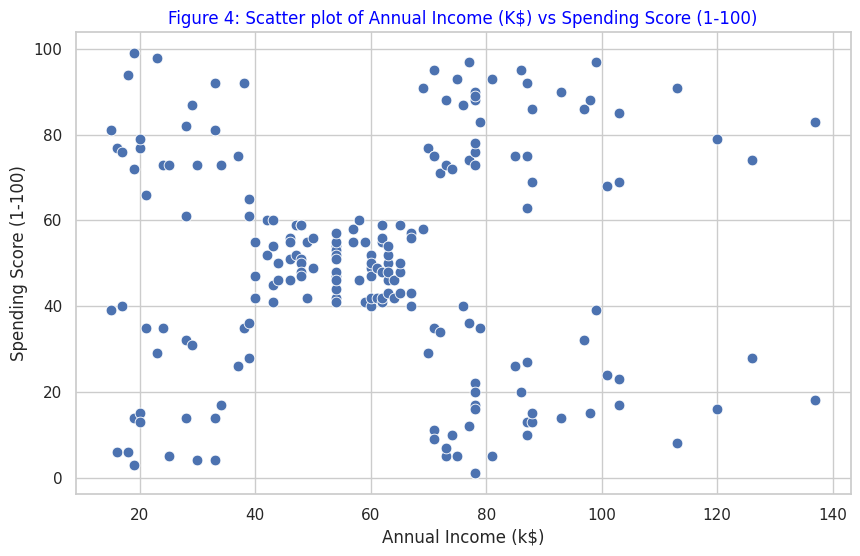

In [13]:
# Scatterplot of the data
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, s = 60)
plt.title("Figure 4: Scatter plot of Annual Income (K$) vs Spending Score (1-100)", color = "blue")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

1. How many distinct customer segments exist? From the scatter plot
   above, there are 5 different segment of the customers.

2. What are the key characteristics of each segment?

      i)   Unequal data points in each segment.

      ii)  The data point appears in form of a line joining the clusters

3. Which features (age, income, spending score) influence segmentation  the most?

   Spending is the feature that influence segmentation the most.
4. Can we identify high-value customers for targeted promotions?

    Yes, we can. From figure 5 below, Customers whose spending is more than 80% can be singled out for promotion


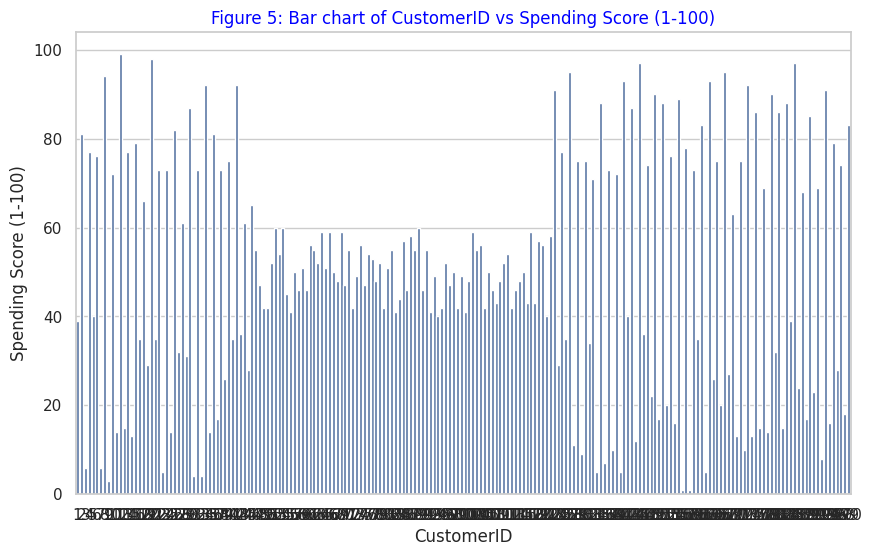

In [15]:
#  Barchart of spending  vs CustomerID the data
plt.figure(figsize = (10, 6))
sns.barplot(x = "CustomerID", y = "Spending Score (1-100)", data = df)
plt.title("Figure 5: Bar chart of CustomerID vs Spending Score (1-100)", color = "blue")
plt.xlabel("CustomerID")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [9]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
dfs = df.drop(features, axis = 1)

In [10]:
# Import and ignore warnings
import warnings
warnings.filterwarnings("ignore")

data = df[features].copy()

In [ ]:
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [16]:
# Scale the data
data = (data - data.min()) / (data.max() - data.min()) * 9+1

In [17]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,4.608654,4.360984,5.518367
std,2.417713,1.937561,2.371548
min,1.000000,1.000000,1.000000
25%,2.860577,2.954918,4.099490
50%,4.115385,4.430328,5.500000
75%,6.365385,5.647541,7.612245
max,10.000000,10.000000,10.000000


**Implement K-Means clustering.**

In [18]:
# Create a centroid
centroid = data.apply(lambda x: float(x.sample()))

In [19]:
centroid

,0
Age,6.192308
Annual Income (k$),6.237705
Spending Score (1-100),4.857143


In [20]:
# For k centroid, we will have k clusters, k = 5
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis =1)

In [21]:
centroids = random_centroids(data, 5)
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis = 1)))
  return distances.idxmin(axis = 1)

In [22]:
labels = get_labels(data, centroids)
labels  # Since our center is , we will have 0, 1, 2, 3 and 4 entries in our y variables (labels)

,0
0,3
1,4
2,3
3,4
4,3
...,...
195,2
196,2
197,2
198,2


In [23]:
labels.value_counts()

,count
2,78
1,51
4,38
3,18
0,15


In [24]:
# Updating the Cluster
def update_centroids(data, labels, k):
  centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
  return centroids

In [25]:
# Imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [26]:
# Plotting the Cluster
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components = 2)
  plot_data = pca.fit_transform(data)
  plot_centroids = pca.transform(centroids.T)
  clear_output(wait = True)
  plt.title(f"Scatter plot showing the iteration of the clusters, {iteration}")
  plt.scatter(x = plot_data[:, 0], y = plot_data[:, 1], c = labels)
  plt.scatter(x = plot_centroids[:, 0], y = plot_centroids[:, 1], marker = "x", s = 100, c = "black")
  plt.show()

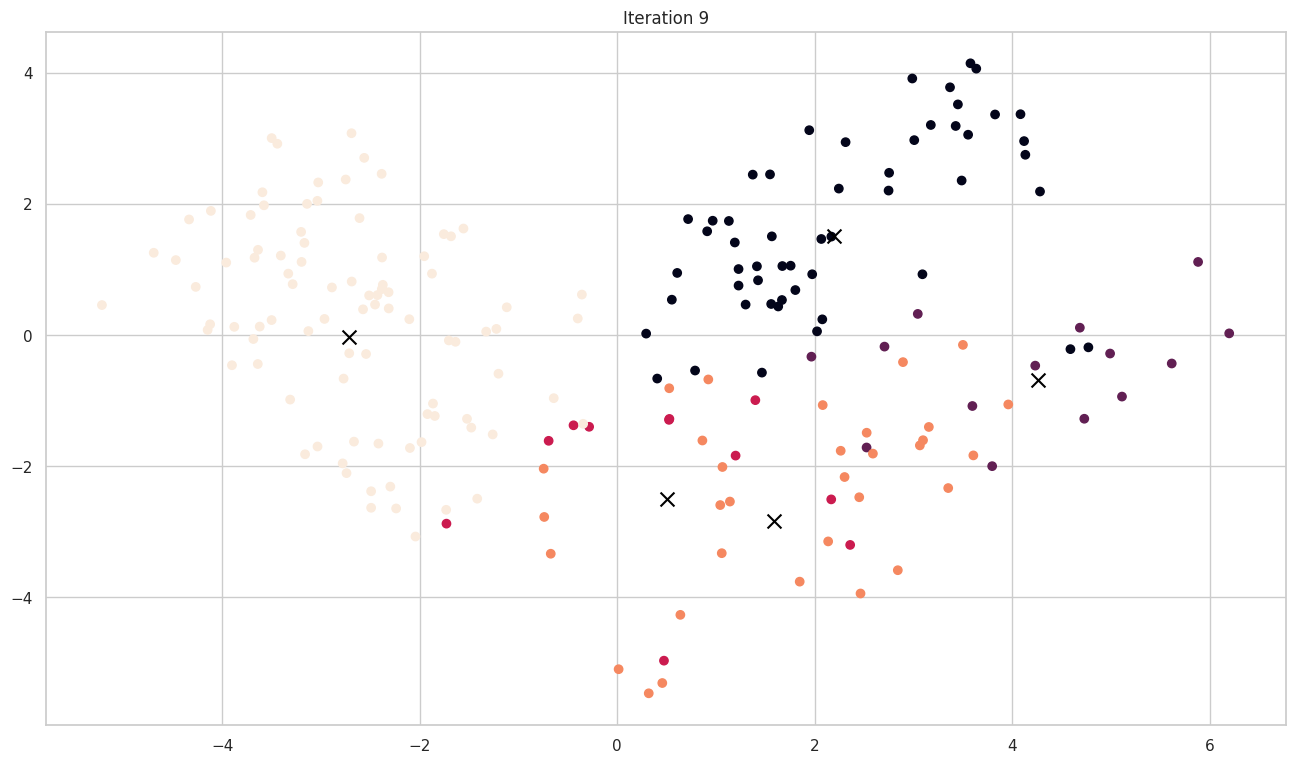

In [27]:
Max_iterations = 10
k = 5
centroids = random_centroids(data, k)
Old_centroids = pd.DataFrame()
iteration = 1
while iteration < Max_iterations and not centroids.equals(Old_centroids):
  Old_centroids = centroids.copy()
  labels = get_labels(data, centroids)
  centroids = update_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1

**Applying PCA for dimensionality reduction.**

It works by transforming high-dimensional data into a lower-dimensional space while maximizing the variance or spread of the data in the new space. This helps preserve the most important patterns and relationships in the data.

In [28]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,1.173077,1.000000,4.489796
1,1.519231,1.000000,8.346939
2,1.346154,1.073770,1.459184
3,1.865385,1.073770,7.979592
4,3.250000,1.147541,4.581633


In [29]:
# Initialize PCA
pca = PCA(n_components = 2)

# Fitting
data_pca = pca.fit_transform(data)
data_pca

array([[-1.72998985, -2.87714486],
       [-4.12357518,  0.16336383],
       [ 0.47305698, -4.96668265],
       [-3.62120885,  0.12815181],
       [-0.28482779, -1.40020368],
       [-3.68553915, -0.061734  ],
       [ 2.35894372, -3.20154982],
       [-4.69477727,  1.25343353],
       [ 6.19797241,  0.02455227],
       [-2.4290988 ,  0.6081451 ],
       [ 5.88286535,  1.11385105],
       [-3.50015573,  3.00222045],
       [ 4.68525987,  0.11094823],
       [-3.50090949,  0.22722856],
       [ 2.1670609 , -2.50722366],
       [-3.87870725,  0.1241127 ],
       [ 0.52814017, -1.27997099],
       [-3.31311871, -0.9851971 ],
       [ 3.04376859,  0.32124199],
       [-3.4427833 ,  2.91622142],
       [ 0.52393001, -1.29440107],
       [-3.12866621,  0.05926961],
       [ 3.79714792, -2.00049348],
       [-2.37459219,  0.76436073],
       [ 4.23336715, -0.46755834],
       [-3.19750197,  1.11412729],
       [ 1.96640342, -0.33074937],
       [-1.119319  ,  0.42209096],
       [ 1.3984215 ,

In [30]:
pca.explained_variance_ratio_  # Maximum Variance Captured

array([0.5002501 , 0.25327226])

***Summary***

In this project, we discussed one of the most famous clustering algorithms – K-Means Clustering. We implemented it and looked at its step-by-step implementation. We try to assigning data points to the nearest centroid, iteratively refining clusters. K-means clustering is an unsupervised learning method that group unlabeled data into clusters based on similarity. It’s a technique to minimize distances between data points and their respective cluster centers.
PCA is a statistical technique introduced by mathematician Karl Pearson in 1901. It works by transforming high-dimensional data into a lower-dimensional space while maximizing the variance (or spread) of the data in the new space. This helps preserve the most important patterns and relationships in the data.
